# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Dharun Ramesh \
**Email:** dr4075@nyu.edu

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

To ensure generalization to new speakers, the dataset must be split by speaker, not by recording. All recordings from each person are kept entirely within one split. A suitable partition is: 80 speakers for training, 10 for validation, and 10 for testing. This prevents speaker-specific acoustic patterns from leaking into validation or test sets. Stratifying by factors such as phone model or environment further stabilizes distributional balance. All days and sessions of each speaker remain within the same split to avoid partial leakage.

With the addition of 10,000 recordings from Kilian, the goal expands: maintain broad generalization while achieving strong performance for a single target speaker. First, train a global base model using the original 80-speaker training set and tune it using the 10-speaker validation set. Then, create a Kilian-specific adaptation set (8,000 train / 1,000 val / 1,000 test). Personalize the base model using lightweight fine-tuning, such as adapter modules or a speaker-specific prediction head, trained only on Kilian’s data. This approach boosts Kilian-specific performance while preserving the general model’s ability to handle unseen speakers.

### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


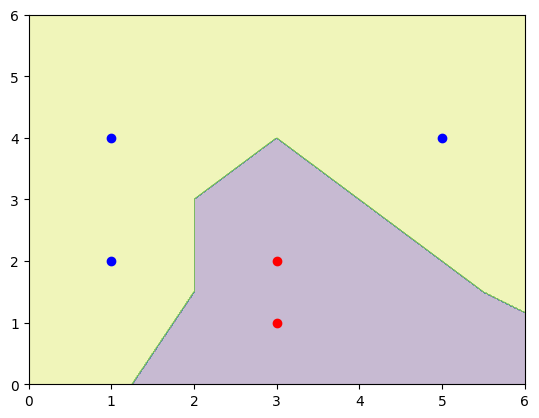

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

pos1 = np.array([[1,2],[1,4],[5,4]])
neg1 = np.array([[3,1],[3,2]])
X1 = np.vstack([pos1, neg1])
y1 = np.array([1,1,1,0,0])

xx, yy = np.meshgrid(np.linspace(0,6,400), np.linspace(0,6,400))
grid = np.c_[xx.ravel(), yy.ravel()]

def knn_1(X, y, p):
    d = np.linalg.norm(X - p, axis=1)
    return y[np.argmin(d)]

pred1 = np.array([knn_1(X1, y1, p) for p in grid])
Z = pred1.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(pos1[:,0], pos1[:,1], c='blue')
plt.scatter(neg1[:,0], neg1[:,1], c='red')
plt.show()

pos2 = np.array([[100,2],[100,4],[500,4]])
neg2 = np.array([[300,1],[300,2]])
X2 = np.vstack([pos2, neg2])
y2 = np.array([1,1,1,0,0])

p = np.array([500,1])
pred_before = knn_1(X2, y2, p)

scaler = MinMaxScaler()
X2_scaled = scaler.fit_transform(X2)
p_scaled = scaler.transform([p])[0]
pred_after = knn_1(X2_scaled, y2, p_scaled)

def knn_missing(x_train, y_train, x_test):
    mask = ~np.isnan(x_test)
    d = np.linalg.norm((x_train[:,mask] - x_test[mask]), axis=1)
    return y_train[np.argmin(d)]

def reason_high_dim():
    return "KNN works due to local similarity, strong structure and manifold concentration in image space"


### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

Evaluating the classifier h(x) = sign(w · x) on both the training set (D_TR) and test set (D_TE) allows us to compute the observed training and test errors, but it does not explain why the test error may be higher. This comparison only reveals the empirical difference: if more points in D_TE are misclassified than in D_TR, the test error is higher. However, this evaluation alone cannot diagnose overfitting, margin issues, or differences in distribution between training and test data; it simply measures performance on the given samples. While the suggestion is valid for computing empirical error rates, it does not provide deeper insight into generalization.

For the Perceptron algorithm, there is no need to explicitly compute training error because of its update rule. The Perceptron only updates the weight vector w when a training point is misclassified. Once training finishes, it means the algorithm has made no further updates, implying it correctly classifies all training examples that it last used for updates. Therefore, the final hypothesis achieves zero training error (assuming the data is linearly separable), making explicit computation unnecessary.

### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

w0 = (0, 0) \
w1 = (10, -2) \
w2 = (-2, -4) \
w3 = (8, -6) \
w4 = (-4, -8) \
w5 = (6, -10) \
w6 = (-6, -12) \
w7 = (4, -14) \
w8 = (-8, -16) \
w9 = (2, -18)

### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

w0 = (0, 0, 0, 0, 0)\
w1 = (0, 0, 0, 0, 4)\
w2 = (0, 0, 0, 0, 8)\
w3 = (0, 0, 6, 13, 8)\
w4 = (-3, 0, 6, 13, 8)\
w5 = (-3, -9, 3, 7, 8)\
w6 = (-3, -10, 3, 5, 3)\
w_final = (-3, -10, 3, 5, 3)


### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

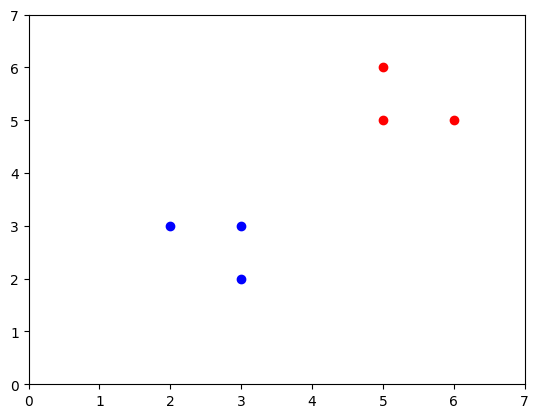

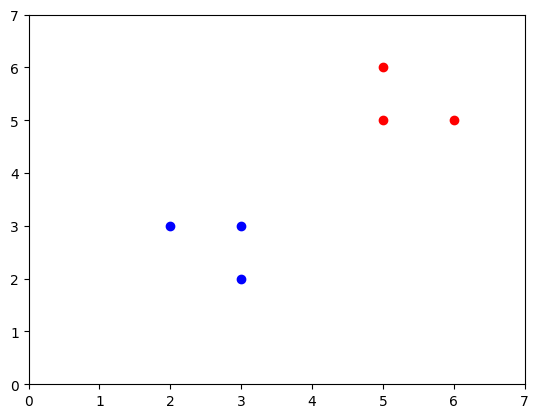

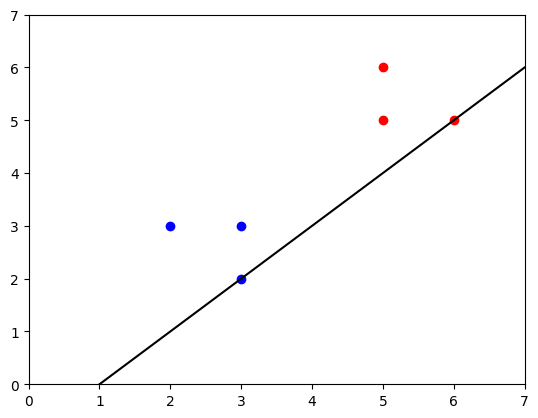

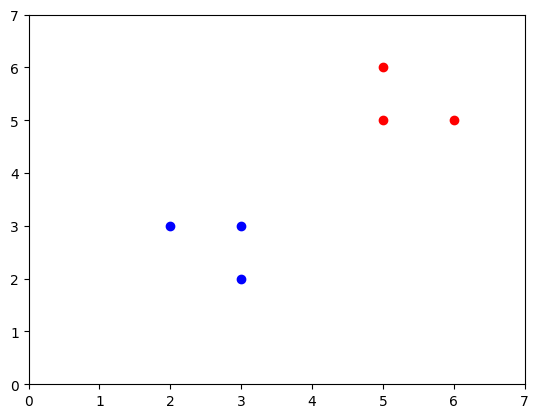

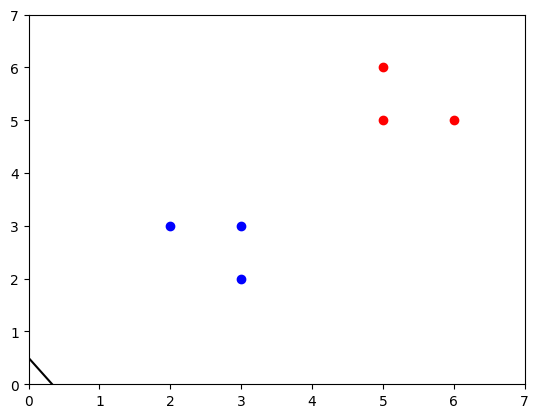

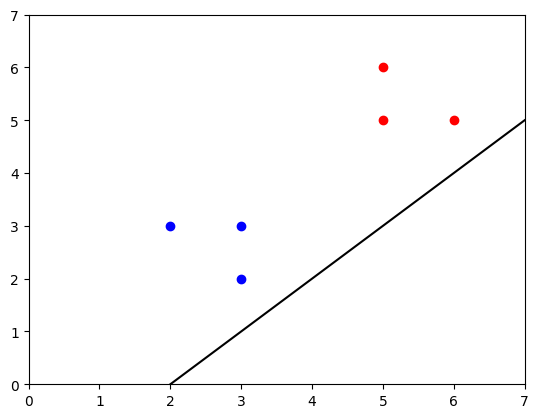

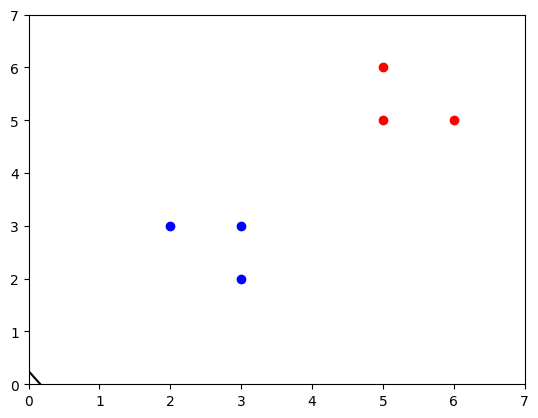

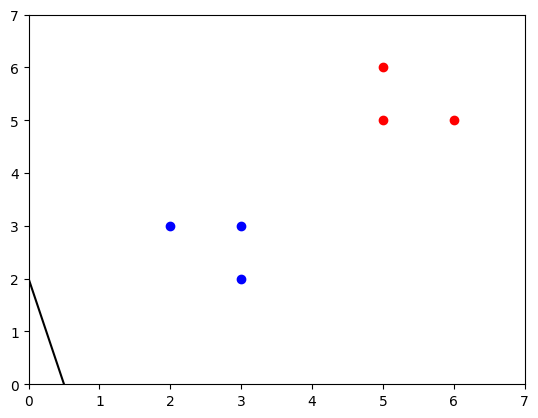

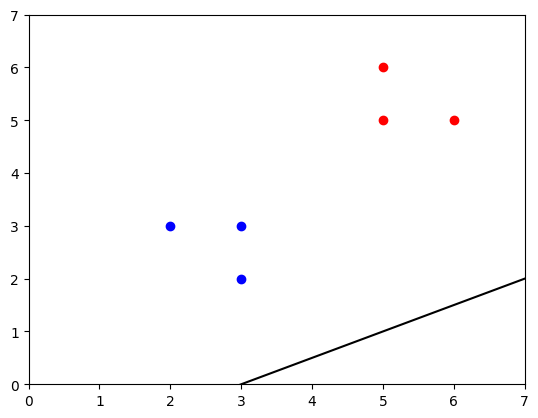

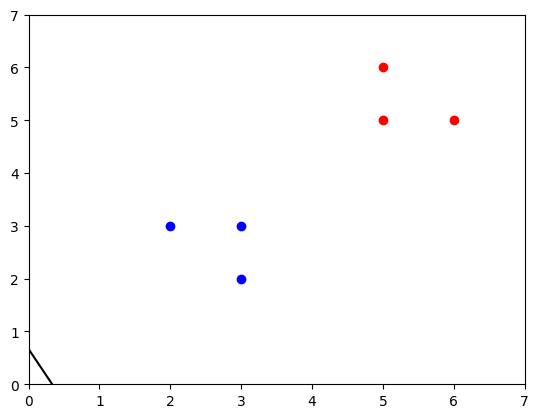

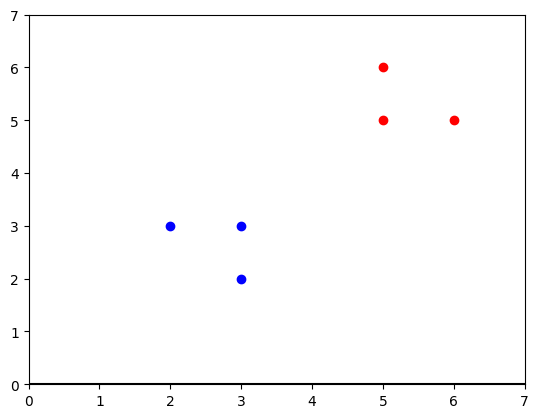

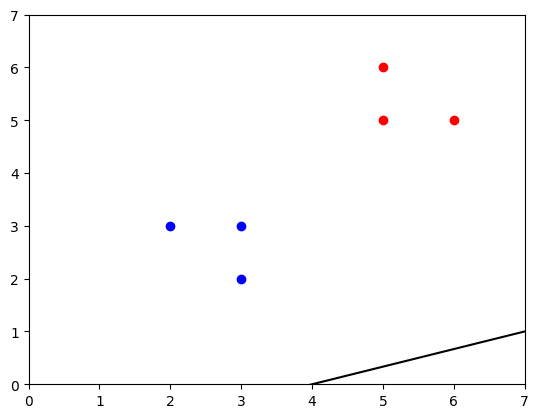

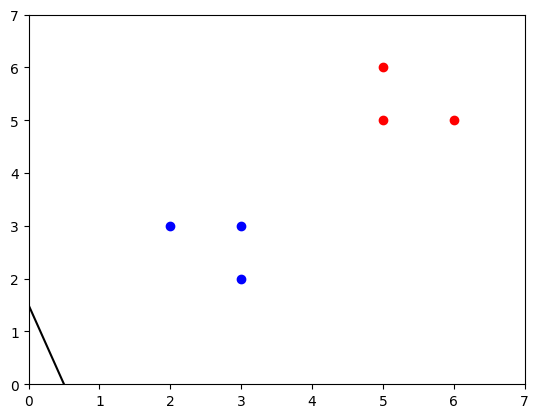

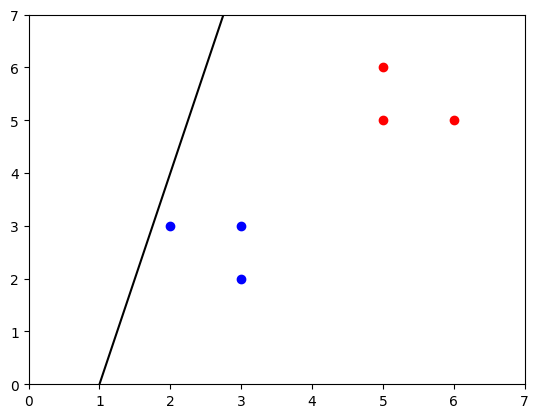

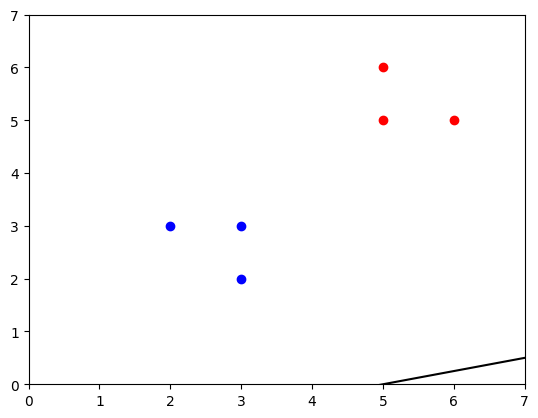

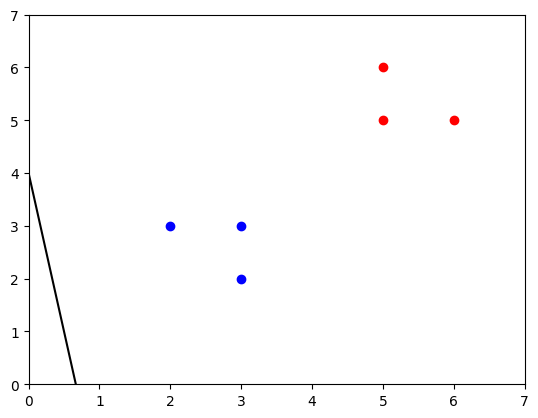

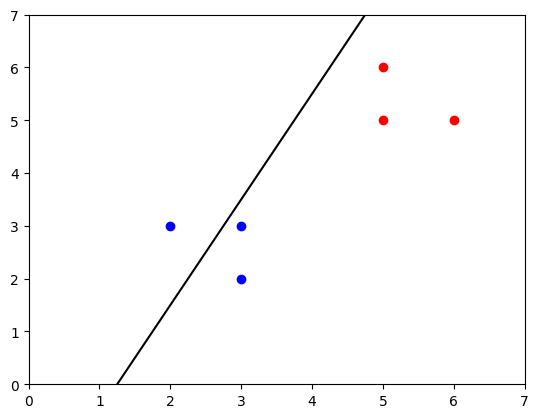

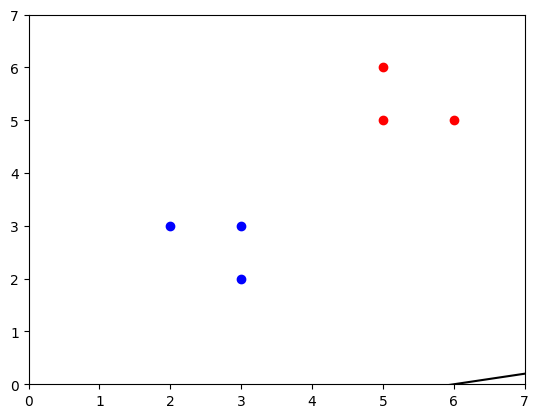

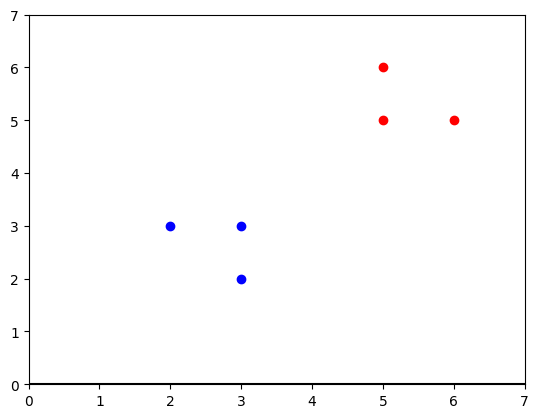

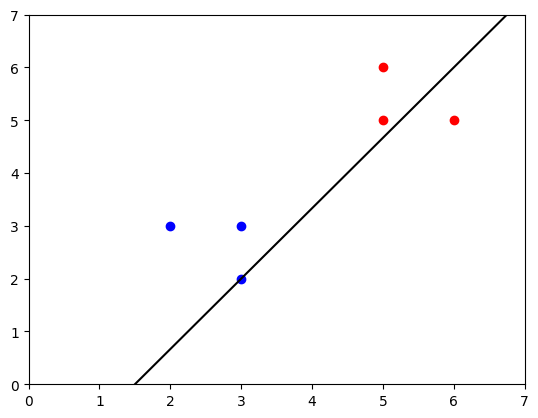

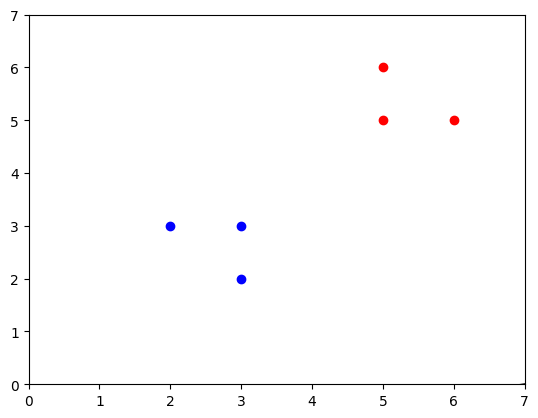

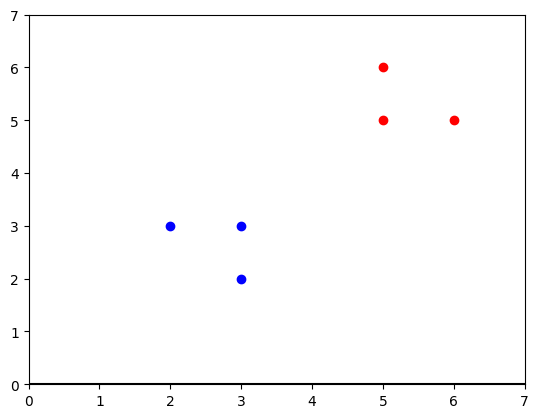

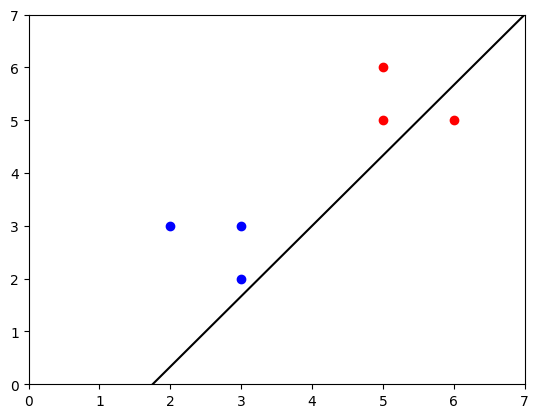

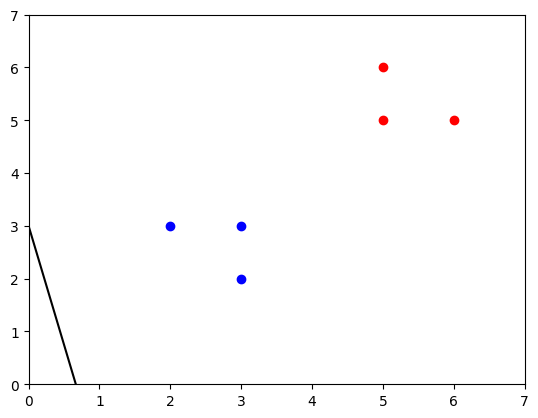

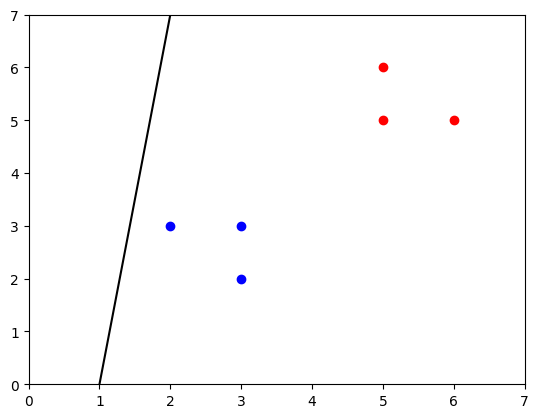

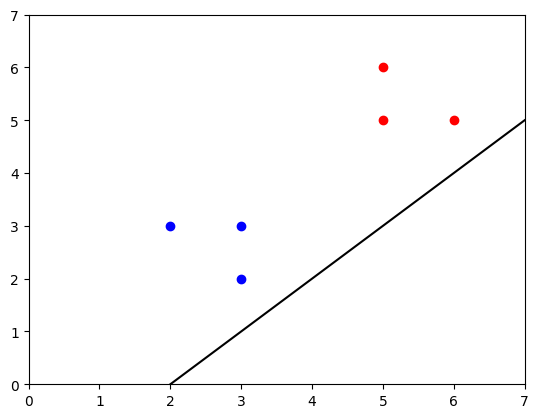

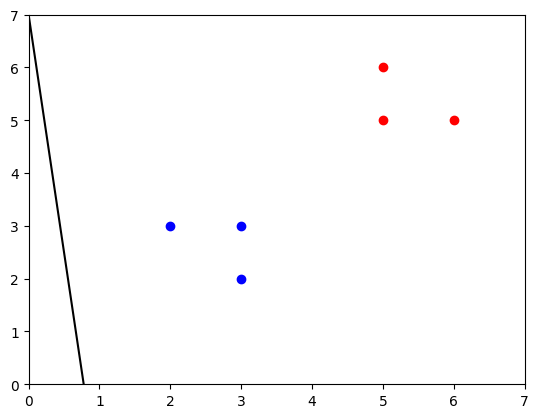

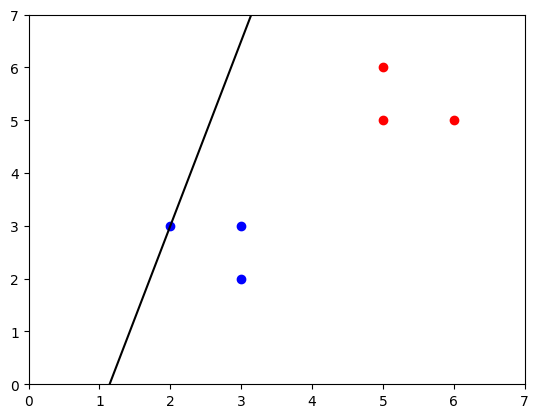

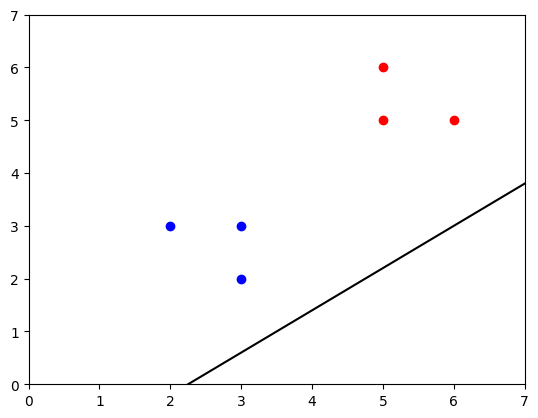

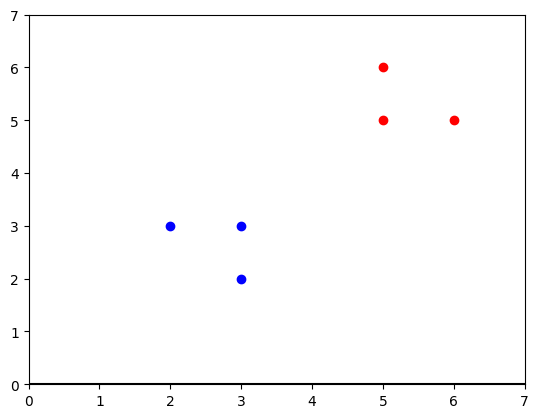

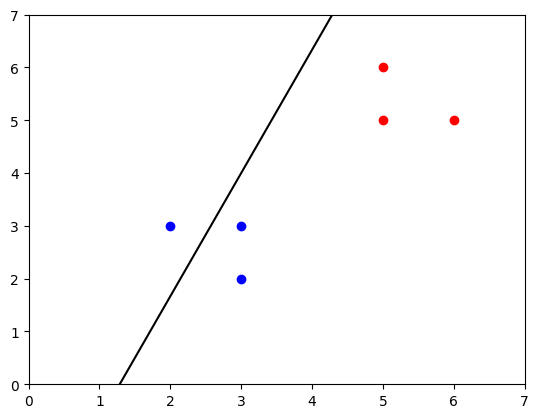

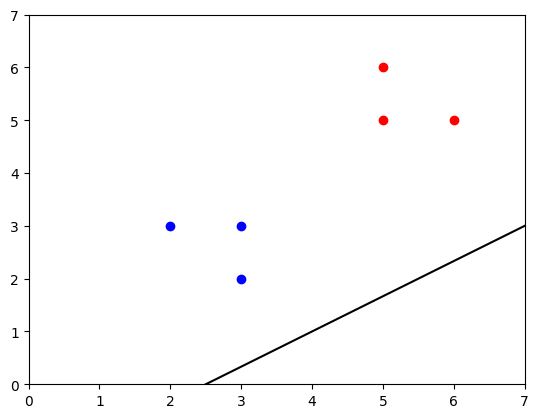

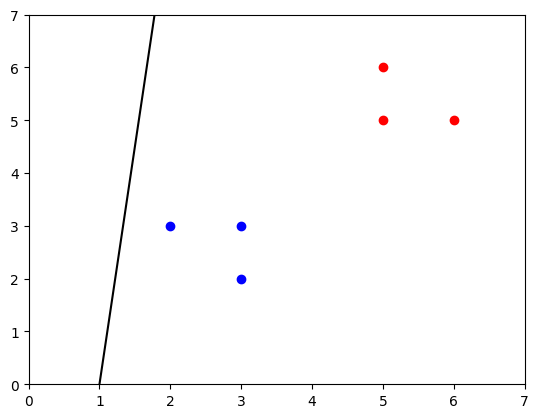

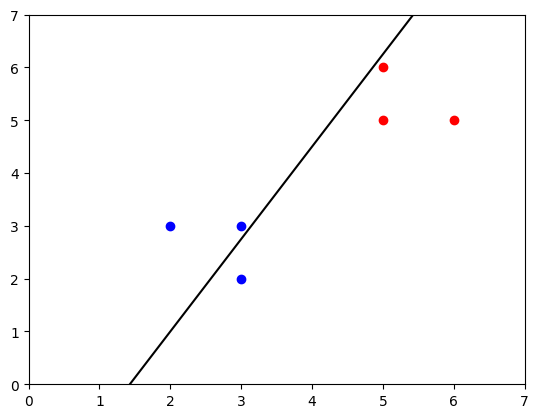

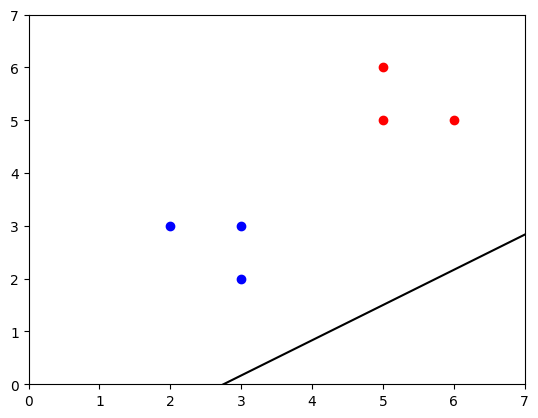

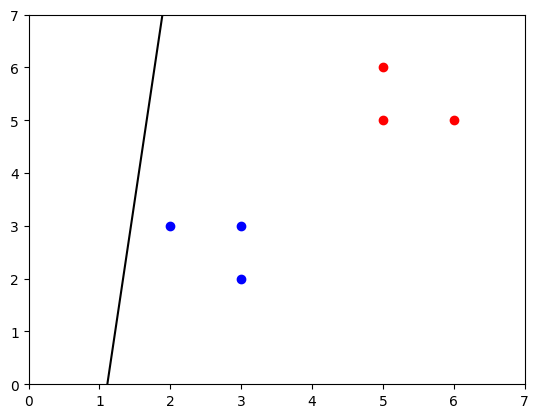

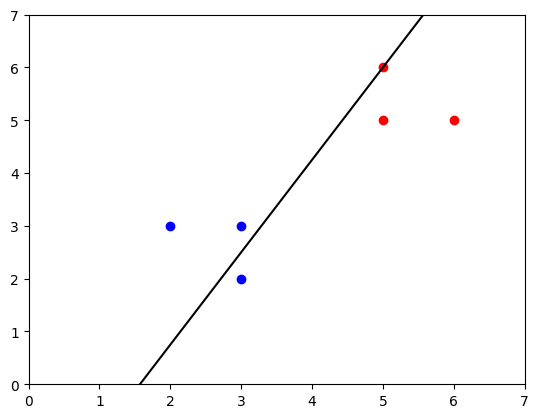

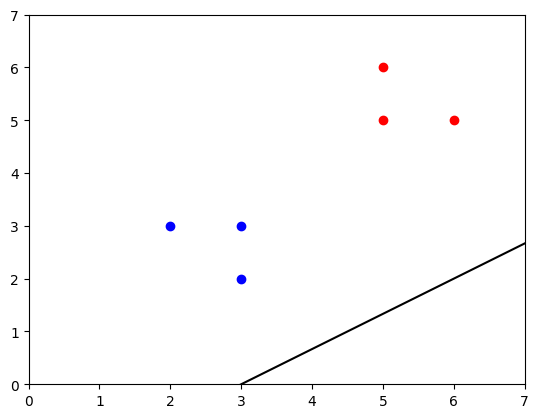

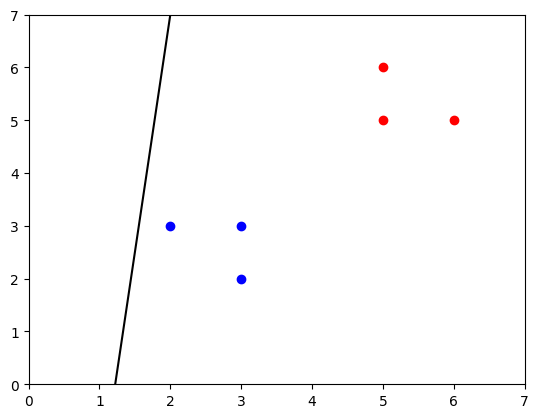

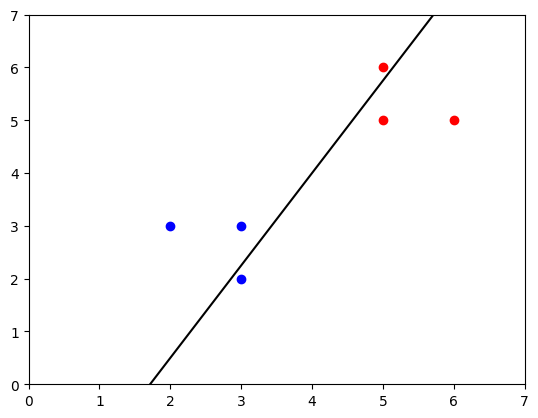

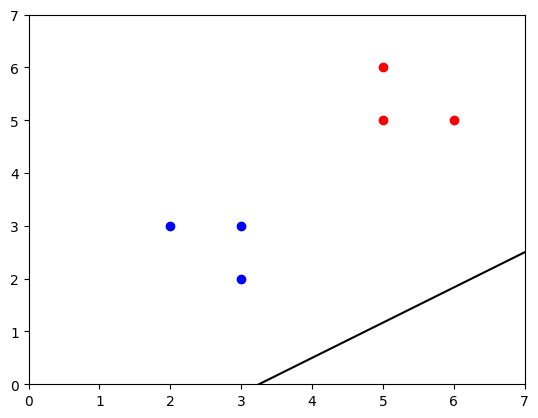

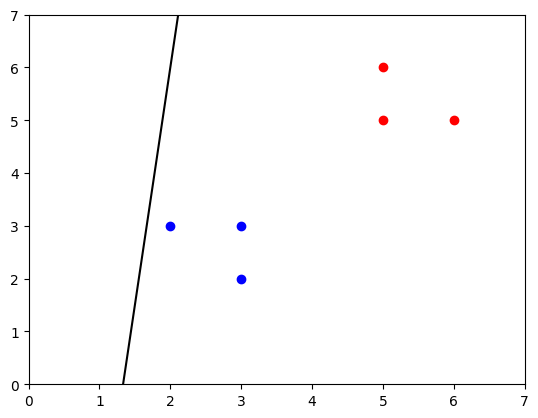

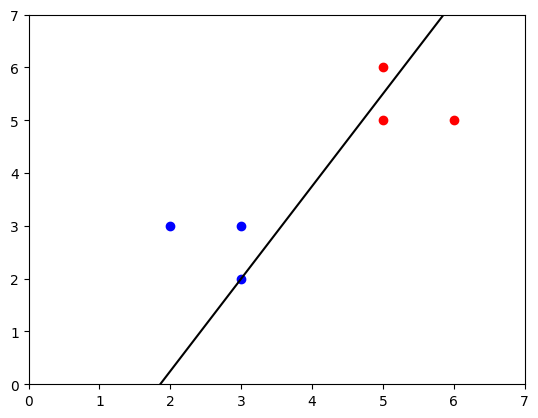

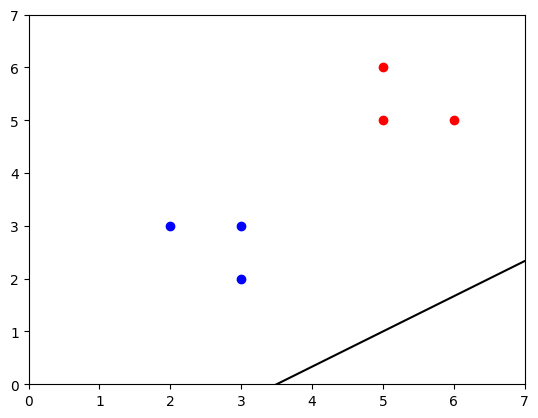

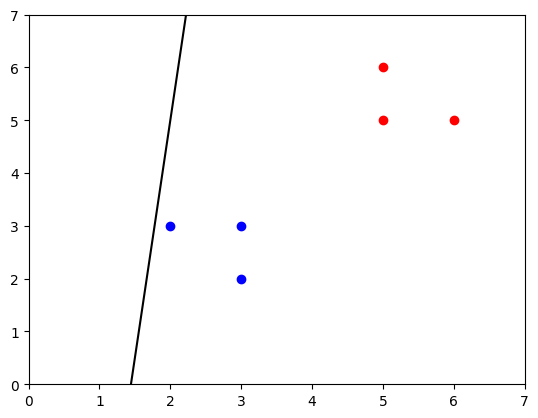

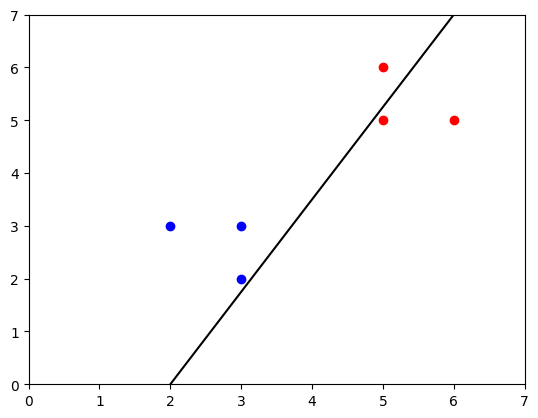

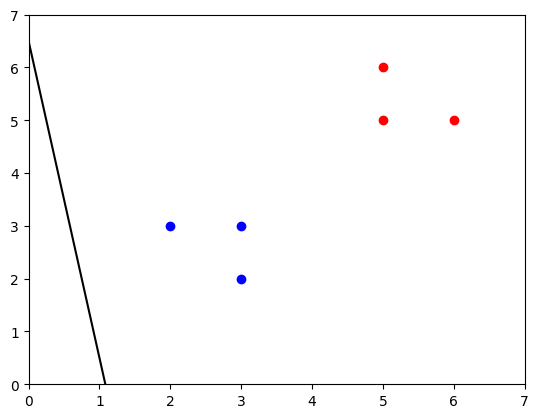

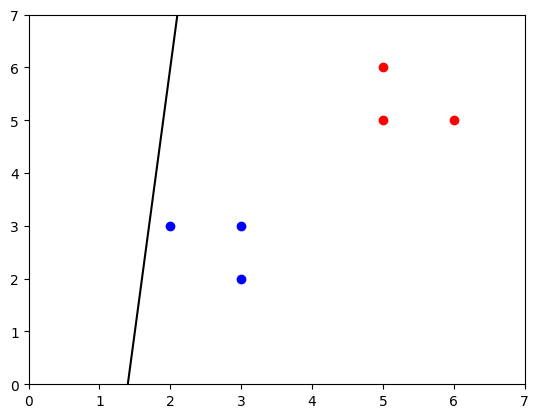

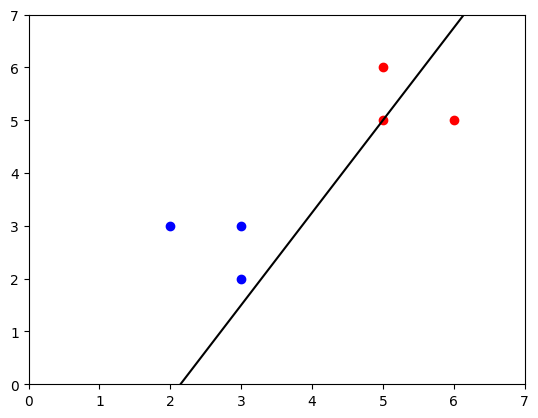

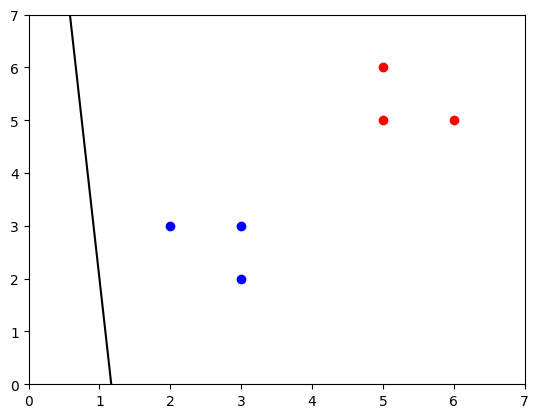

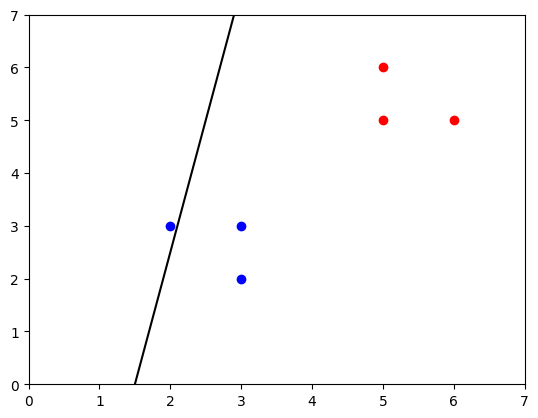

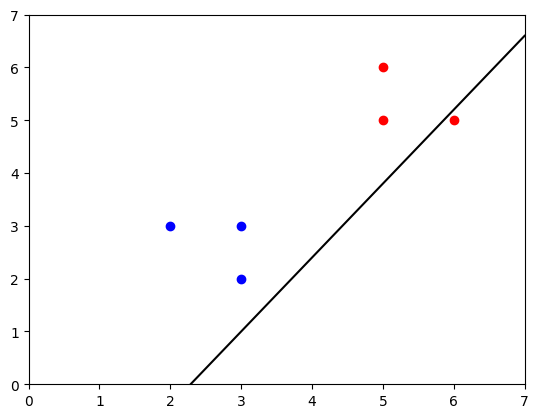

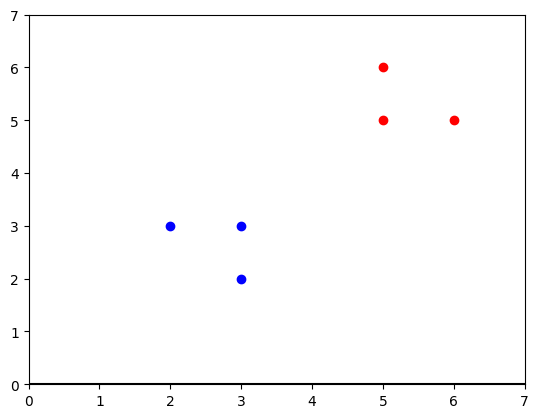

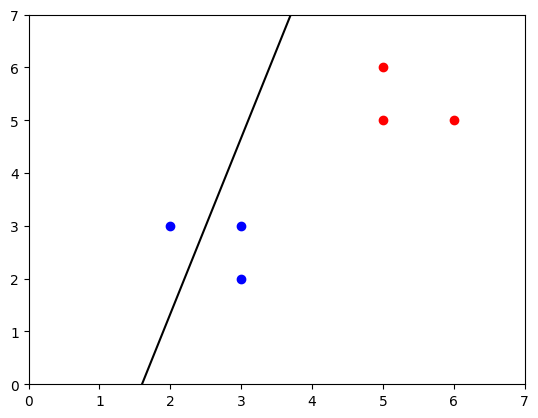

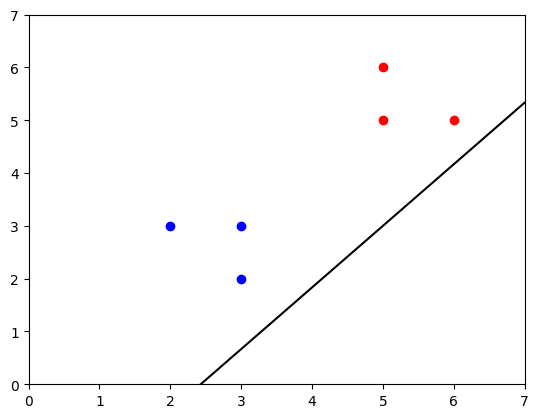

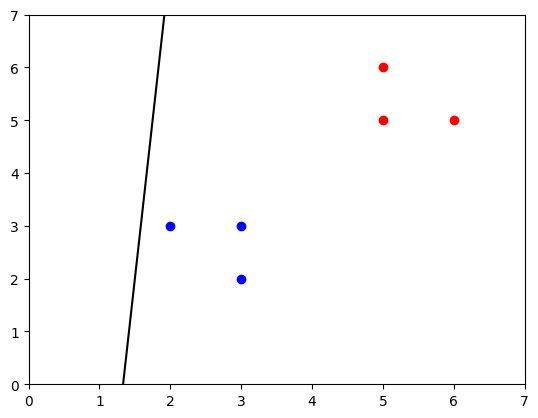

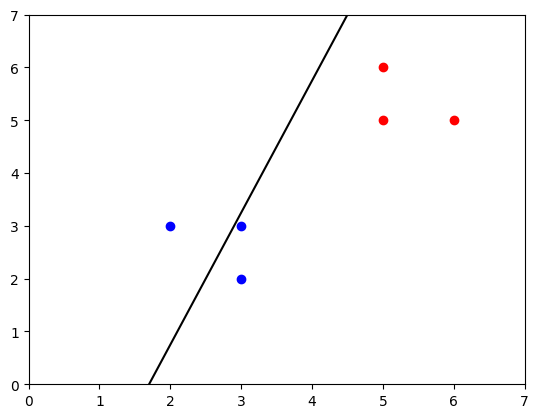

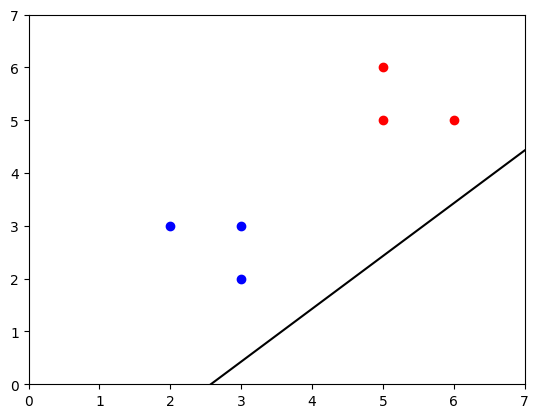

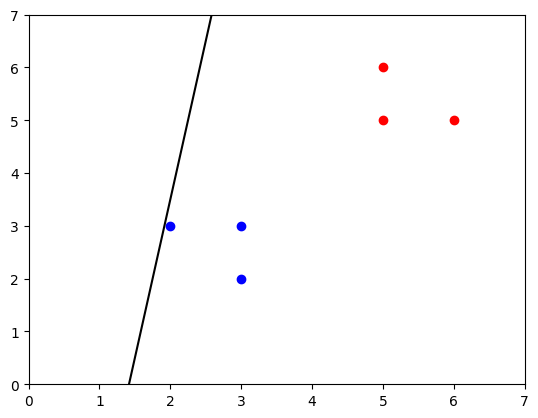

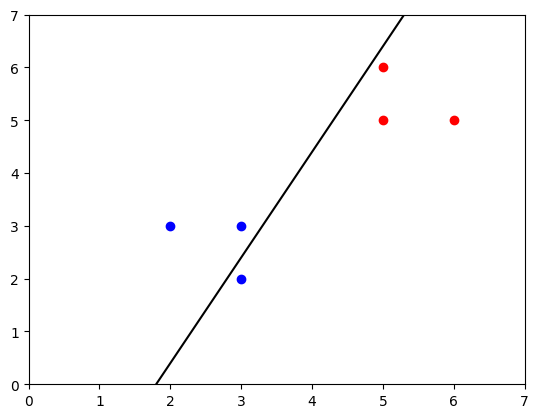

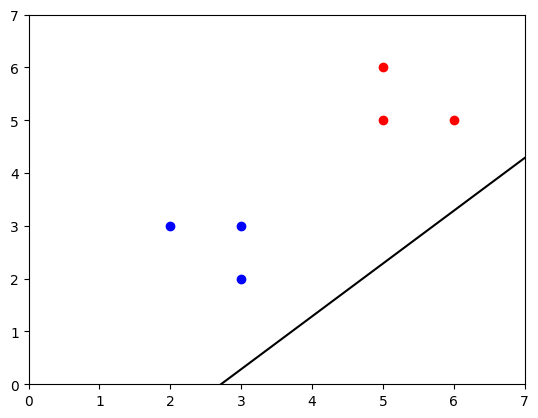

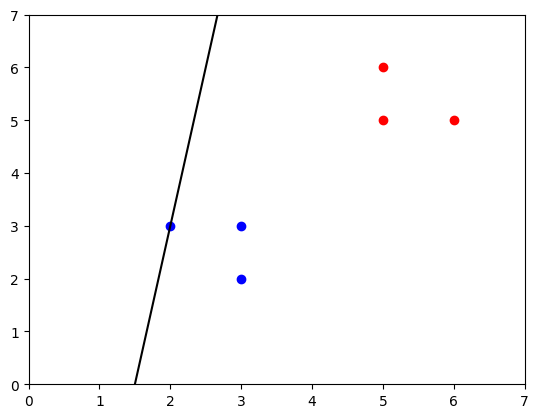

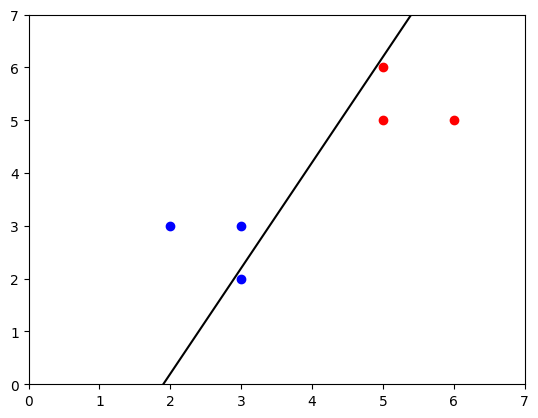

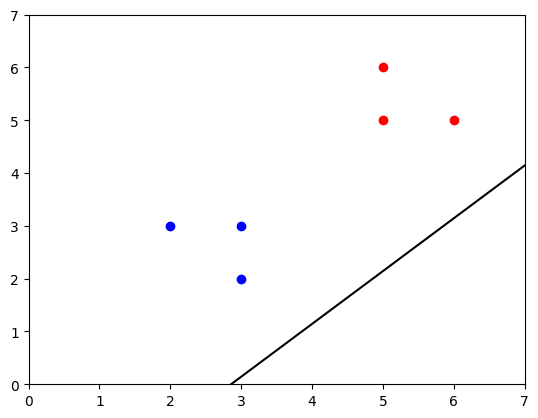

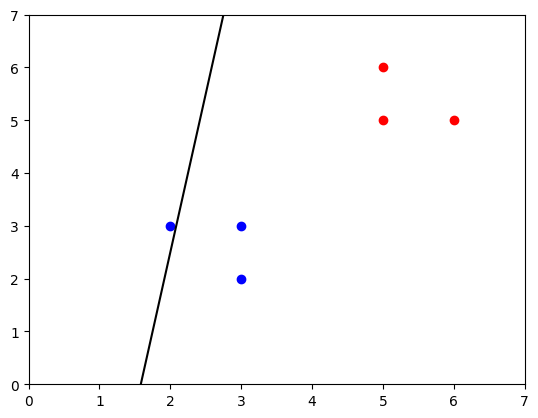

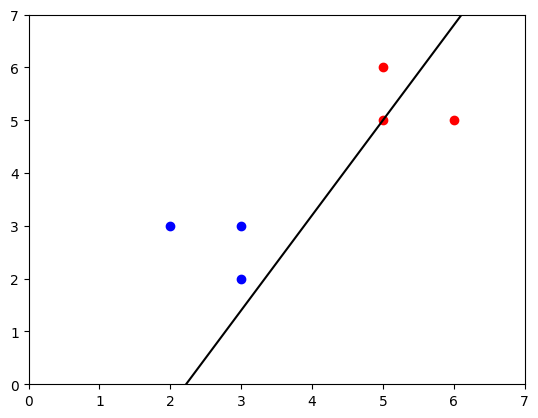

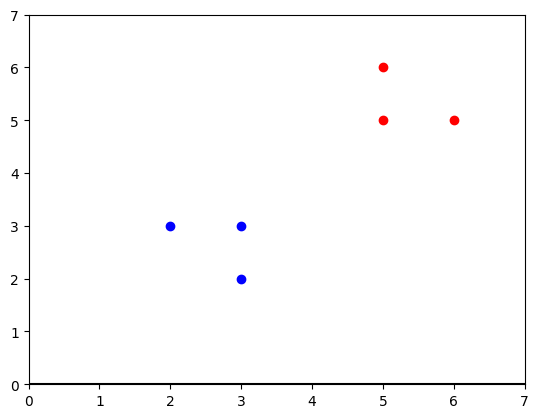

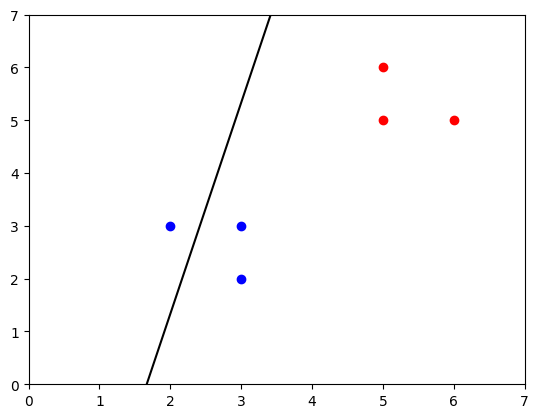

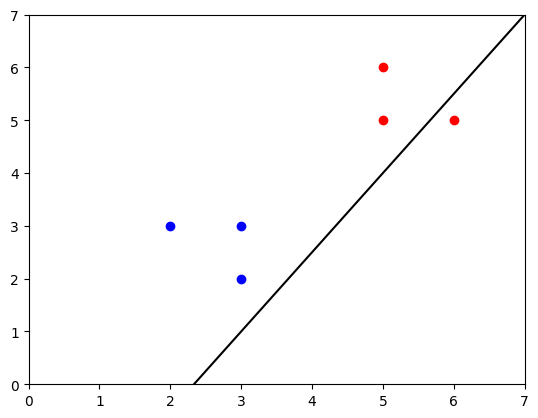

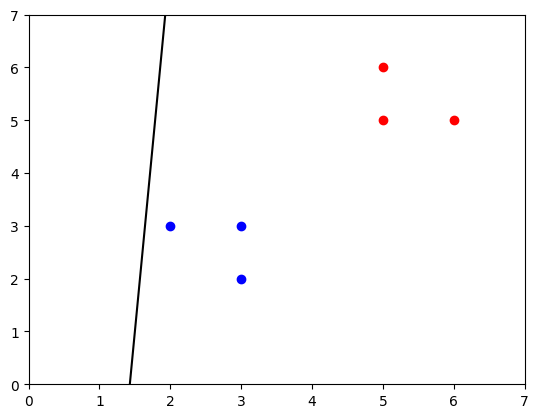

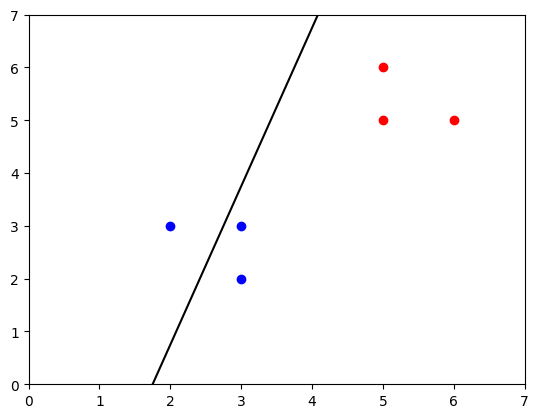

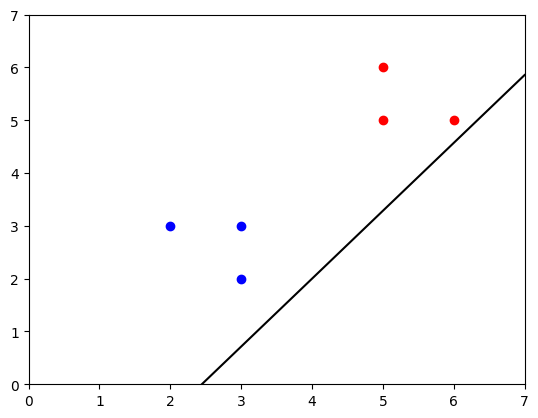

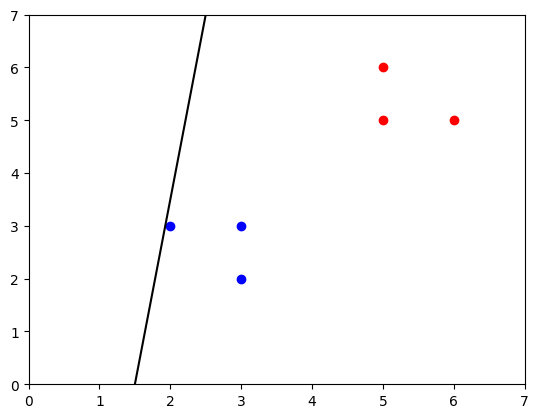

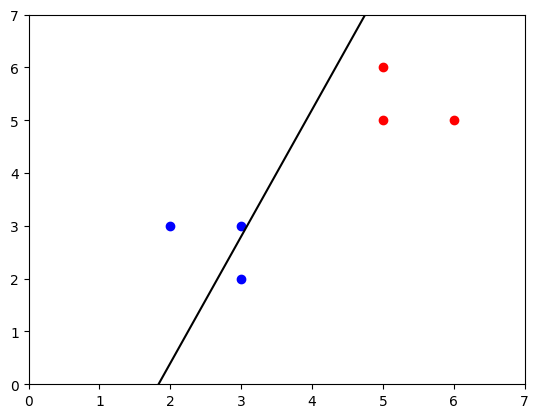

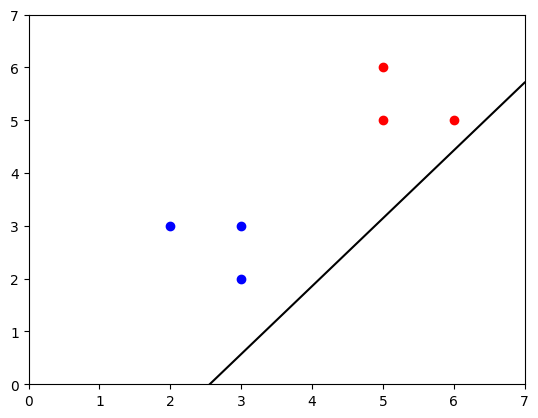

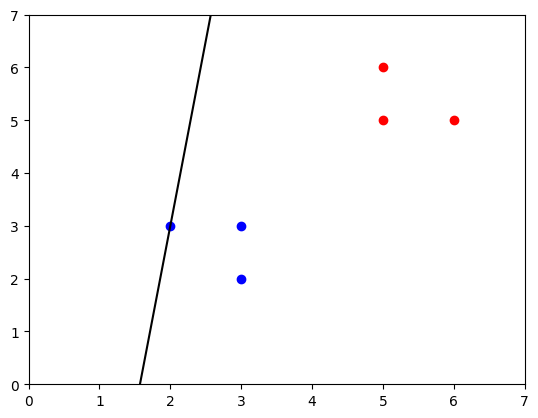

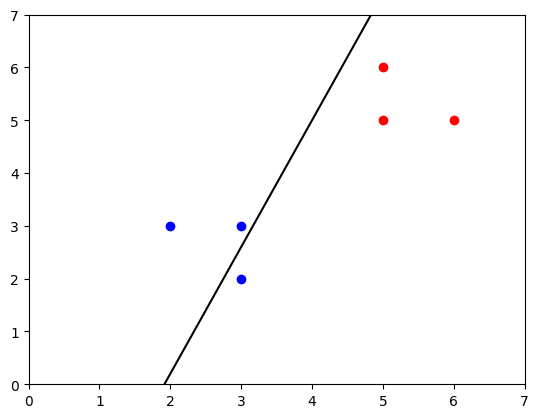

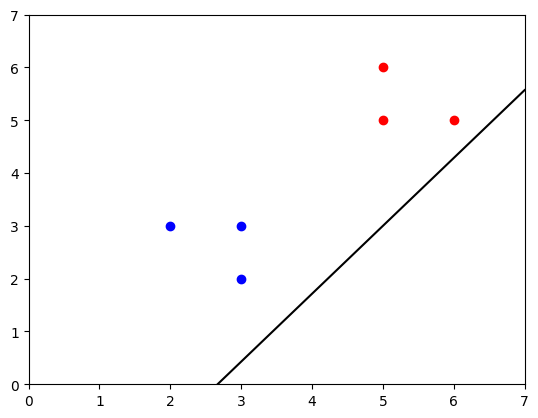

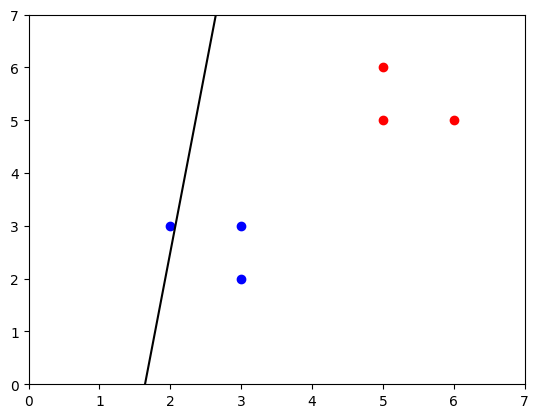

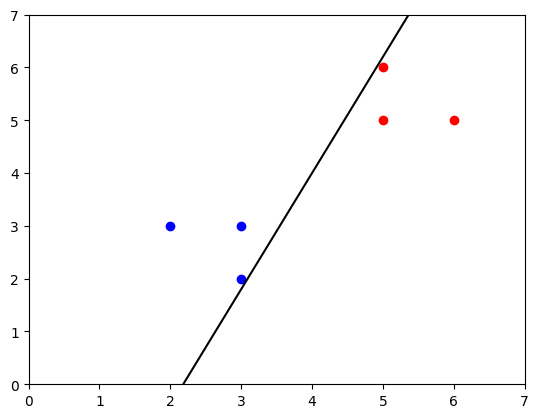

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[2,3],[3,3],[3,2],[5,5],[6,5],[5,6]])
y = np.array([1,1,1,-1,-1,-1])
w = np.zeros(3)
eta = 1

def plot_boundary(w, X, y):
    xx = np.linspace(0,7,200)
    yy = -(w[0]*xx + w[2])/w[1] if w[1]!=0 else np.zeros_like(xx)
    plt.plot(xx, yy, 'k-')
    plt.scatter(X[y==1,0], X[y==1,1], c='blue')
    plt.scatter(X[y==-1,0], X[y==-1,1], c='red')
    plt.xlim(0,7)
    plt.ylim(0,7)
    plt.show()

X_aug = np.hstack([X, np.ones((X.shape[0],1))])
converged = False

while not converged:
    converged = True
    for i in range(X_aug.shape[0]):
        if y[i]*np.dot(w, X_aug[i]) <= 0:
            w = w + eta*y[i]*X_aug[i]
            converged = False
            plot_boundary(w, X, y)
